In [3]:
!pip install pandas scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


In [5]:
import pandas as pd

file_path = r"C:\Users\adhar\Downloads\twitter_reviews.csv"
colnames = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(file_path, encoding='latin-1', header=None, names=colnames)

# Map numbers to sentiment labels
sentiment_map = {0: 'negative', 2: 'neutral', 4: 'positive'}
df['sentiment'] = df['target'].map(sentiment_map)

print(df[['text', 'sentiment']].head())
print(df['sentiment'].value_counts())


                                                text sentiment
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  negative
1  is upset that he can't update his Facebook by ...  negative
2  @Kenichan I dived many times for the ball. Man...  negative
3    my whole body feels itchy and like its on fire   negative
4  @nationwideclass no, it's not behaving at all....  negative
sentiment
negative    800000
positive    800000
Name: count, dtype: int64


In [6]:
import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[' + string.punctuation + ']', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
print(df[['text', 'cleaned_text', 'sentiment']].head())


                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text sentiment  
0  awww thats a bummer you shoulda got david carr...  negative  
1  is upset that he cant update his facebook by t...  negative  
2  i dived many times for the ball managed to sav...  negative  
3     my whole body feels itchy and like its on fire  negative  
4  no its not behaving at all im mad why am i her...  negative  


In [7]:
from sklearn.model_selection import train_test_split

X = df['cleaned_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(y_train.value_counts(), y_test.value_counts())


sentiment
positive    640000
negative    640000
Name: count, dtype: int64 sentiment
negative    160000
positive    160000
Name: count, dtype: int64


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'



Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.78      0.79    160000
    positive       0.78      0.80      0.79    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



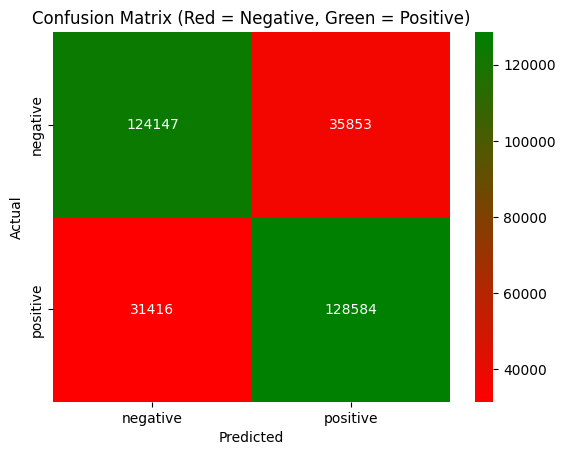

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

y_pred = model.predict(X_test_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cmap = LinearSegmentedColormap.from_list("red_green", ["red", "green"])
class_order = ['negative', 'positive']
cm = confusion_matrix(y_test, y_pred, labels=class_order)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
            xticklabels=class_order, yticklabels=class_order)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Red = Negative, Green = Positive)')
plt.show()


In [12]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return prediction

# --- USER INSTRUCTIONS ---
# 1. Type your review or tweet in the user_review inside the quotes below.
# 2. Run this cell to see the predicted sentiment.

user_review = "i dont like these"

print(f"Your review: {user_review}")
print(f"Predicted sentiment: {predict_sentiment(user_review)}")


Your review: i dont like these
Predicted sentiment: negative
